In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Abhishek\AppData\Roaming\Python\Python37\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Abhishek\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Abhishek\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


###### Load the dataset

In [2]:
dataset = pd.read_csv(r"D:\Restaurant_Reviews.tsv", delimiter = "\t")

In [3]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


#### Text PreProcessing

In [4]:
import re

In [34]:
review = dataset["Review"][0]

In [35]:
review

'Wow... Loved this place.'

##### Removing the unwanted puncuations

In [36]:
re_punt = "[^A-Za-z0-9!?\s]"

In [37]:
review = re.sub(re_punt, "",review)

In [38]:
review

'Wow Loved this place'

### Normalising the case

In [39]:
review = review.lower()

In [40]:
review

'wow loved this place'

In [41]:
import nltk

In [42]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords

In [44]:
nltk.corpus.names

<WordListCorpusReader in '.../corpora/names' (not loaded yet)>

In [45]:
sw_list = stopwords.words("english")

In [46]:
sw_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
review

'wow loved this place'

### Tokenization

In [48]:
review = review.split()

In [49]:
review

['wow', 'loved', 'this', 'place']

### Removing the stop words

In [23]:
# temp_review = review.copy()
# for word in temp_review:
#     if word in sw_list:
#         review.remove(word)

review = [word for word in review if word not in sw_list]

In [24]:
review

['wow', 'loved', 'place']

In [25]:
from nltk.stem import WordNetLemmatizer

In [26]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
lemma = WordNetLemmatizer()

In [32]:
# review_new = []
# for word in review:
#     review_new.append(lemma.lemmatize(word,pos="v"))
    
    
review = [lemma.lemmatize(word, pos="v") for word in review]

In [50]:
review

['wow', 'loved', 'this', 'place']

###### Removal of stop word and Lemmatization

In [51]:
review = [lemma.lemmatize(word, pos="v") for word in review if word not in sw_list]

In [52]:
review

['wow', 'love', 'place']

In [54]:
review = " ".join(review)

In [55]:
review

'wow love place'

In [56]:
def text_preprocessing(review):
    '''
    Preprocesses the given sentence
    '''
    re_punt = "[^A-Za-z0-9!?\s]"
    ### Removing the unwanted puncuations ###
    review = re.sub(re_punt, "",review)
    ##Normalising the case##
    review = review.lower()
    ### Tokenization ##
    review = review.split()
    ### Removal of stop word and Lemmatization ###
    review = [lemma.lemmatize(word, pos="v") for word in review if word not in sw_list]
    ## Join ###
    review = " ".join(review)
    return review

In [57]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [59]:
dataset["Review"] = dataset["Review"].apply(text_preprocessing)

In [60]:
dataset

,Review,Liked
0,wow love place,1
1,crust good,0
2,tasty texture nasty,0
3,stop late may bank holiday rick steve recommen...,1
4,selection menu great price,1
...,...,...
995,think food flavor texture lack,0
996,appetite instantly go,0
997,overall impress would go back,0
998,whole experience underwhelming think well go n...,0


In [62]:
#Top 10 words in terms of frequency

In [65]:
para = " ".join(dataset["Review"])

In [66]:
para

'wow love place crust good tasty texture nasty stop late may bank holiday rick steve recommendation love selection menu great price get angry want damn pho honeslty didnt taste fresh potatoes like rubber could tell make ahead time keep warmer fry great great touch service prompt would go back cashier care ever say still end wayyy overprice try cape cod ravoli chicken cranberrymmmm! disgust pretty sure human hair shock sign indicate cash highly recommend waitress little slow service place worth time let alone vegas like burrittos blah! food amaze service also cute could care less interior beautiful perform thats rightthe red velvet cakeohhh stuff good never bring salad ask hole wall great mexican street tacos friendly staff take hour get food 4 table restaurant food luke warm sever run around like totally overwhelm worst salmon sashimi also combos like burger fry beer 23 decent deal like final blow! find place accident could happier seem like good quick place grab bite familiar pub food

In [67]:
#Dict word, value

In [72]:
word_count = {}.fromkeys(para.split(), 0)
for word in para.split():
    if word in word_count:
        word_count[word] += 1

In [73]:
word_count

{'wow': 3,
 'love': 31,
 'place': 109,
 'crust': 2,
 'good': 91,
 'tasty': 9,
 'texture': 3,
 'nasty': 2,
 'stop': 4,
 'late': 2,
 'may': 5,
 'bank': 1,
 'holiday': 1,
 'rick': 1,
 'steve': 1,
 'recommendation': 3,
 'selection': 10,
 'menu': 15,
 'great': 68,
 'price': 21,
 'get': 47,
 'angry': 1,
 'want': 17,
 'damn': 4,
 'pho': 5,
 'honeslty': 1,
 'didnt': 13,
 'taste': 22,
 'fresh': 14,
 'potatoes': 3,
 'like': 51,
 'rubber': 1,
 'could': 16,
 'tell': 9,
 'make': 26,
 'ahead': 1,
 'time': 54,
 'keep': 5,
 'warmer': 1,
 'fry': 16,
 'touch': 3,
 'service': 82,
 'prompt': 1,
 'would': 28,
 'go': 75,
 'back': 57,
 'cashier': 2,
 'care': 4,
 'ever': 26,
 'say': 26,
 'still': 11,
 'end': 4,
 'wayyy': 1,
 'overprice': 7,
 'try': 17,
 'cape': 1,
 'cod': 1,
 'ravoli': 1,
 'chicken': 17,
 'cranberrymmmm!': 1,
 'disgust': 3,
 'pretty': 19,
 'sure': 8,
 'human': 2,
 'hair': 2,
 'shock': 1,
 'sign': 2,
 'indicate': 1,
 'cash': 1,
 'highly': 4,
 'recommend': 14,
 'waitress': 9,
 'little': 10,
 's

In [81]:
top_15_words = pd.Series(para.split()).value_counts().sort_values(ascending = False).head(15)

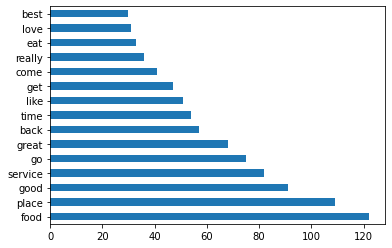

In [84]:
top_15_words.plot(kind = "barh")

In [85]:
#get top 10 postive word based on frquency

In [86]:
dataset

,Review,Liked
0,wow love place,1
1,crust good,0
2,tasty texture nasty,0
3,stop late may bank holiday rick steve recommen...,1
4,selection menu great price,1
...,...,...
995,think food flavor texture lack,0
996,appetite instantly go,0
997,overall impress would go back,0
998,whole experience underwhelming think well go n...,0


In [94]:
#dataset[dataset["Liked"] == 1]
#dataset.query("Liked == 1")

postive_para = " ".join(dataset[dataset["Liked"] == 1]["Review"])

In [98]:
pd.Series(postive_para.split()).value_counts().sort_values(ascending = False).head(20)

good          69
great         68
place         59
food          58
service       45
love          28
go            28
time          25
friendly      23
nice          22
best          22
really        22
back          20
like          20
come          18
also          17
price         16
restaurant    16
amaze         16
staff         15
dtype: int64

In [99]:
negative_para = " ".join(dataset[dataset["Liked"] == 0]["Review"])
pd.Series(negative_para.split()).value_counts().sort_values(ascending = False).head(20)

food          64
place         50
go            47
service       37
back          37
get           34
like          31
time          29
wait          26
dont          25
come          23
eat           22
never         22
good          22
would         21
minutes       19
bad           18
ever          17
think         16
disappoint    16
dtype: int64

#### WordCloud

In [100]:
!pip install wordcloud

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [101]:
from wordcloud import WordCloud

In [124]:
wc = WordCloud( width=600,
    height=400,background_color='white')

In [125]:
wc

In [126]:
word_count

{'wow': 3,
 'love': 31,
 'place': 109,
 'crust': 2,
 'good': 91,
 'tasty': 9,
 'texture': 3,
 'nasty': 2,
 'stop': 4,
 'late': 2,
 'may': 5,
 'bank': 1,
 'holiday': 1,
 'rick': 1,
 'steve': 1,
 'recommendation': 3,
 'selection': 10,
 'menu': 15,
 'great': 68,
 'price': 21,
 'get': 47,
 'angry': 1,
 'want': 17,
 'damn': 4,
 'pho': 5,
 'honeslty': 1,
 'didnt': 13,
 'taste': 22,
 'fresh': 14,
 'potatoes': 3,
 'like': 51,
 'rubber': 1,
 'could': 16,
 'tell': 9,
 'make': 26,
 'ahead': 1,
 'time': 54,
 'keep': 5,
 'warmer': 1,
 'fry': 16,
 'touch': 3,
 'service': 82,
 'prompt': 1,
 'would': 28,
 'go': 75,
 'back': 57,
 'cashier': 2,
 'care': 4,
 'ever': 26,
 'say': 26,
 'still': 11,
 'end': 4,
 'wayyy': 1,
 'overprice': 7,
 'try': 17,
 'cape': 1,
 'cod': 1,
 'ravoli': 1,
 'chicken': 17,
 'cranberrymmmm!': 1,
 'disgust': 3,
 'pretty': 19,
 'sure': 8,
 'human': 2,
 'hair': 2,
 'shock': 1,
 'sign': 2,
 'indicate': 1,
 'cash': 1,
 'highly': 4,
 'recommend': 14,
 'waitress': 9,
 'little': 10,
 's

In [127]:
reviews_wc = wc.generate(para)

In [128]:
reviews_wc

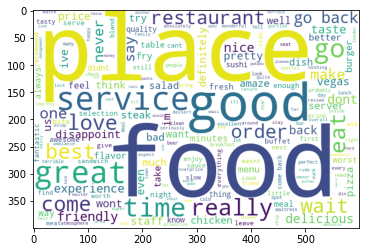

In [129]:
plt.imshow(reviews_wc)

In [130]:
dataset

,Review,Liked
0,wow love place,1
1,crust good,0
2,tasty texture nasty,0
3,stop late may bank holiday rick steve recommen...,1
4,selection menu great price,1
...,...,...
995,think food flavor texture lack,0
996,appetite instantly go,0
997,overall impress would go back,0
998,whole experience underwhelming think well go n...,0
